In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [45]:
def synthetic_data(w, b, num_examples):
    # 生成均值为0，方差为1，大小为(num_examples, len(w))的tensor数据
    x = torch.normal(0, 1, (num_examples, len(w))) 
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))
true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
len(features), features.shape

(1000, torch.Size([1000, 2]))

In [12]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.3807, -2.0742]) 
label: tensor([10.4898])


这里内核挂掉的话，可以卸载numpy然后重新安装

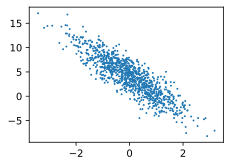

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [56]:
idx =list(range(10))
random.shuffle(idx)
idx, idx[2:2+3]

([3, 9, 6, 4, 7, 2, 5, 0, 1, 8], [6, 4, 7])

In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[ 0.0995,  1.0918],
        [ 0.2717, -0.4681],
        [-0.9324, -0.2786],
        [ 0.7671, -0.1113],
        [ 0.4019, -1.4740],
        [-0.2844,  0.9978],
        [-0.2458,  0.0540],
        [-0.6021, -0.2628],
        [-0.1115, -0.2229],
        [-1.3344, -0.5983]]) 
 tensor([[ 0.6846],
        [ 6.3571],
        [ 3.2761],
        [ 6.1129],
        [10.0157],
        [ 0.2487],
        [ 3.5397],
        [ 3.9064],
        [ 4.7344],
        [ 3.5745]])


In [3]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [4]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [17]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [32]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.01
num_epochs = 10
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 2.281630
epoch 2, loss 0.328225
epoch 3, loss 0.047888
epoch 4, loss 0.007125
epoch 5, loss 0.001111
epoch 6, loss 0.000212
epoch 7, loss 0.000076
epoch 8, loss 0.000055
epoch 9, loss 0.000052
epoch 10, loss 0.000052


In [33]:
print(f'w的估计误差 : {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差 : {true_b - b}')

w的估计误差 : tensor([0.0006, 0.0002], grad_fn=<SubBackward0>)
b的估计误差 : tensor([-4.1485e-05], grad_fn=<RsubBackward1>)


In [34]:
w,b

(tensor([[ 1.9994],
         [-3.4002]], requires_grad=True),
 tensor([4.2000], requires_grad=True))

下面是线性回归的简洁实现：使用pytorch接口

In [35]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [58]:
a =  torch.Tensor(range(12)).reshape(3, 4)
a, *a

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([0., 1., 2., 3.]),
 tensor([4., 5., 6., 7.]),
 tensor([ 8.,  9., 10., 11.]))

In [36]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 1.0132,  2.1825],
         [ 0.3709,  0.1536],
         [ 1.3861, -0.2546],
         [ 0.1071,  0.6797],
         [ 1.1642, -1.1324],
         [-0.0702,  0.9321],
         [-1.6855,  1.1384],
         [-0.9520, -0.7047],
         [-0.6473,  0.1815],
         [ 0.1280,  0.0899]]),
 tensor([[-1.1830],
         [ 4.3972],
         [ 7.8376],
         [ 2.1194],
         [10.3730],
         [ 0.8858],
         [-3.0472],
         [ 4.6913],
         [ 2.2948],
         [ 4.1642]])]

In [37]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [38]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [39]:
loss = nn.MSELoss()

In [40]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [43]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')



epoch 1, loss 0.000105
epoch 2, loss 0.000105
epoch 3, loss 0.000106
